## Task #2

## Prediction using Unsupervised ML

### Author : Gaurav Khare

● From the given ‘Iris’ dataset, predict the optimum number of clusters  and represent it visually. 

● Dataset : https://bit.ly/3kXTdox

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading data
data = pd.read_csv("Iris.csv")
print("Data imported successfully")

Data imported successfully


In [3]:
# Top 5 Rows of the dataset
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Botom 5 Rows of the dataset
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
#Droping theId and Species column
data=data.drop(['Id'],axis=1)

In [6]:
data[str('Species')]=data[str('Species')].astype('category').cat.codes   

In [7]:
# Determining the shape of the dataset
print("There are total %d columns in the dataset." %data.shape[1])
print("There are total %d rows in the dataset." %data.shape[0])

There are total 5 columns in the dataset.
There are total 150 rows in the dataset.


In [8]:
# Basic Information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int8   
dtypes: float64(4), int8(1)
memory usage: 5.0 KB


In [9]:
# Determining the Datatype of the dataset
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species             int8
dtype: object

In [10]:
# Determining the unique values in the dataset
data.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [11]:
#Determining the missing values in the dataset
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
#Determining the null values in the dataset
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
# Descriptive Statistics of the dataset
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


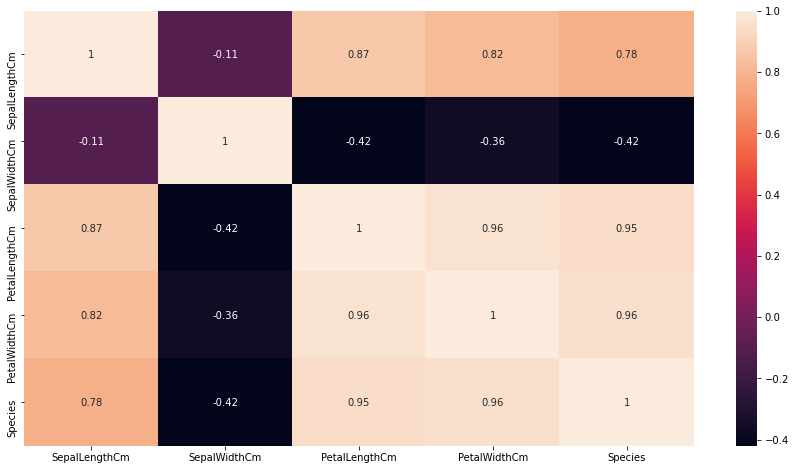

In [15]:
plt.figure(figsize = (15,8))        
sns.heatmap(data.corr(),annot = True)
plt.show()

### Determining Outliers in the dataset

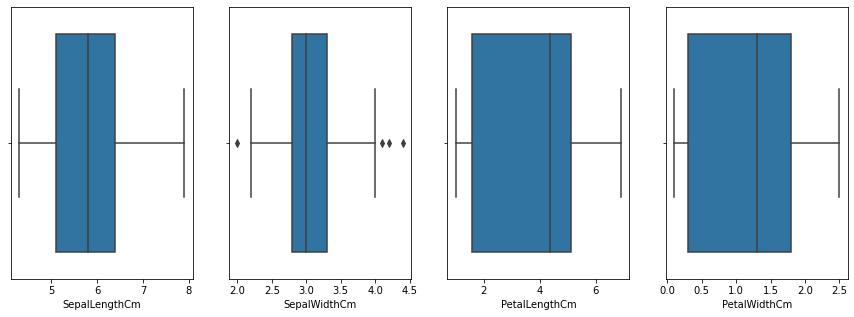

In [16]:
plt.figure(figsize = (15,5))
feature = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
for i in enumerate(feature):
    plt.subplot(1,4, i[0]+1)
    sns.boxplot(data[i[1]])

In [17]:
# outlier treatment for sepal Width Cm
q1_SepalWidthCm = data['SepalWidthCm'].quantile(0.01)
q4_SepalWidthCm= data['SepalWidthCm'].quantile(0.95)
data['SepalWidthCm'] = np.where(data['SepalWidthCm'] <=q1_SepalWidthCm, q1_SepalWidthCm,data['SepalWidthCm'])
data['SepalWidthCm'] = np.where(data['SepalWidthCm'] >=q4_SepalWidthCm, q1_SepalWidthCm,data['SepalWidthCm'])


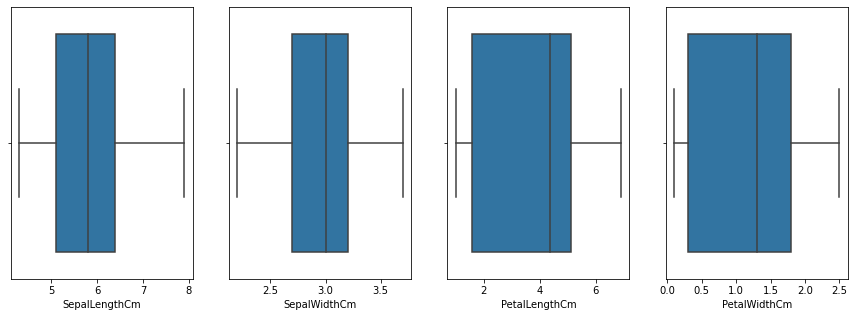

In [18]:
plt.figure(figsize = (15,5))
feature = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
for i in enumerate(feature):
    plt.subplot(1,4, i[0]+1)
    sns.boxplot(data[i[1]])

In [19]:
#use of Standard Scaling Technique for Scaling of the variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [20]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [21]:
#Converting the Scaled Array to a data frame
data_scaled = pd.DataFrame(data_scaled, columns = data.columns)
data_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.900681,1.471025,-1.341272,-1.312977,-1.224745
1,-1.143017,0.211586,-1.341272,-1.312977,-1.224745
2,-1.385353,0.715361,-1.398138,-1.312977,-1.224745
3,-1.506521,0.463474,-1.284407,-1.312977,-1.224745
4,-1.021849,1.722913,-1.341272,-1.312977,-1.224745


**Finding the Optimal Number of Clusters**

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

The algorithm works as follows:

1. First we initialize k points, called means, randomly.
2. We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.
3. We repeat the process for a given number of iterations and at the end, we have our clusters.

#### Silhouette score
$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$
$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

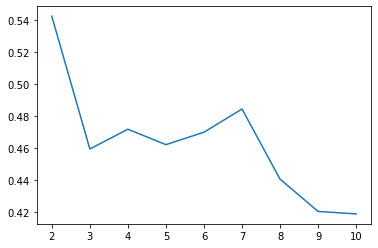

In [22]:
#Silhouette score analysis to find the ideal number of clusters for K-means clustering

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
ss = []
for k in range(2, 11):
     kmean = KMeans(n_clusters = k,init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42,n_jobs=-1).fit(data_scaled)
     ss.append([k, silhouette_score(data_scaled, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])
plt.show()

#### Inference:
- From above plot number_of_cluster=3 looks like a good value for clustering

In [23]:
clusters_range=[2,3,4,5,6,7,8,9,10,11]                                  # selecting range of clusters
for i in clusters_range:                                                # For loop
    kmeans=KMeans(n_clusters=i,init = 'k-means++', 
                  max_iter = 500, n_init = 10, random_state = 42,n_jobs=-1) # Using iteration 500 for finding Kmeans
    kmeans.fit(data_scaled)                                       # fitting the kmeans
    cluster_label=kmeans.labels_                                        # saving the labels in a cluster_label list
    
    silhouette_Score=silhouette_score(data_scaled,cluster_label)        # finding the silhouette score 
    
    # Printing for all number of clusters of range(2,10) for silhouette score
    
    print("For no. of cluster={0},silhouette score is {1}".format(i,silhouette_Score))

For no. of cluster=2,silhouette score is 0.5425080150479257
For no. of cluster=3,silhouette score is 0.45942223717628167
For no. of cluster=4,silhouette score is 0.4717965077000956
For no. of cluster=5,silhouette score is 0.46213034792226704
For no. of cluster=6,silhouette score is 0.46993307453316835
For no. of cluster=7,silhouette score is 0.48443675688294907
For no. of cluster=8,silhouette score is 0.44053121211781654
For no. of cluster=9,silhouette score is 0.4203384087079697
For no. of cluster=10,silhouette score is 0.41878625982484785
For no. of cluster=11,silhouette score is 0.42290489881234256


#### Inference
- A score closer to 1 indicates that the data point is very similar to other data points in the cluster
- As per the business we will choose value of clusters as 2, as 3 clusters will not be a good decision

#### Elbow curve-ssd

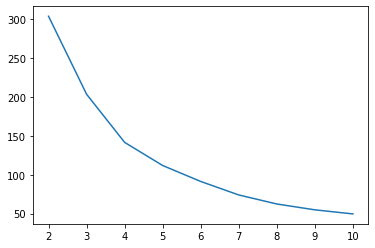

In [24]:
# Elbow curve method to find the ideal number of clusters.
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k,init = 'k-means++', 
                   max_iter = 300, n_init = 10, random_state = 42,n_jobs=-1).fit(data_scaled)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])
plt.show()

#### Inference:

- Looking at the above elbow curve it looks like a good to proceed with 3 clusters. we will go ahead with 3 clusters

In [25]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(data_scaled)


In [26]:
label  = pd.DataFrame(y_kmeans, columns= ['group_labels'])
label.head()

,group_labels
0,2
1,2
2,2
3,2
4,2


In [27]:
data_scaled = pd.concat([data_scaled, label], axis =1)
data_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,group_labels
0,-0.900681,1.471025,-1.341272,-1.312977,-1.224745,2
1,-1.143017,0.211586,-1.341272,-1.312977,-1.224745,2
2,-1.385353,0.715361,-1.398138,-1.312977,-1.224745,2
3,-1.506521,0.463474,-1.284407,-1.312977,-1.224745,2
4,-1.021849,1.722913,-1.341272,-1.312977,-1.224745,2


In [28]:
x = data_scaled.iloc[:, [0,1, 2, 3, 4]].values

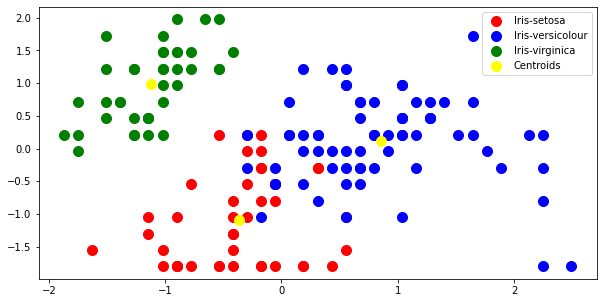

In [29]:
#Visualising the clusters
plt.figure(figsize=(10,5))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend(loc='best')
plt.show()